In [1]:
# Create a pymatgen Structure for NaCl
from pymatgen.core import Structure, Lattice
from vasppy.rdf import RadialDistributionFunction
import matplotlib as mpl

from figure_formatting import figure_formatting as ff
import numpy as np
ff.set_formatting()

Duplicate key in file PosixPath('/Users/swc57/miniconda3/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc'), line 264 ('font.family         : sans-serif')
Duplicate key in file PosixPath('/Users/swc57/miniconda3/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc'), line 270 ('font.sans-serif: DejaVu Sans, Bitstream Vera Sans, Computer Modern Sans Serif, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif')
Duplicate key in file PosixPath('/Users/swc57/miniconda3/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc'), line 707 ('pdf.fonttype:       3  # Output Type 3 (Type3) or Type 42 (TrueType)')
Duplicate key in file PosixPath('/Users/swc57/miniconda3/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc'), line 708 ('pdf.use14corefonts : False')


# Quenched structures for figure 5

This notebook calculates the structural information from quenched structures and forms the basis of Figures 5 and S4. 

The workflow here starts by loading in the final quenched structures from ipython notebooks.

In [2]:
pmgs=[]
for l in range(101,6701,50):
    pmgs.append(Structure.from_file("Structures/Sys"+str(l)+"/CONTCAR"))
for l in range(6751,12601,50):
    pmgs.append(Structure.from_file("Structures/Sys"+str(l)+"/CONTCAR"))

At this point radial distribution functions are calculated for these structures using the vasppy RDF module. Followed by creating the plots used in figure 4.

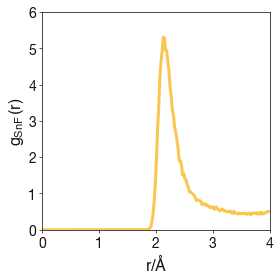

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
rdf_snf = RadialDistributionFunction.from_species_strings(structures=pmgs,
                                                                species_i='F', species_j='Sn')
rdf_baf = RadialDistributionFunction.from_species_strings(structures=pmgs,
                                                                species_i='F', species_j='Ba')
rdf_ff = RadialDistributionFunction.from_species_strings(structures=pmgs,
                                                                species_i='F', species_j='F')

plt.plot(rdf_snf.r, rdf_snf.rdf, label='Ba-F',c='#F9C74F',linewidth=3)
plt.xlim(0,4)
plt.ylim(0,6)
plt.xlabel(r'$r/ \operatorname{\AA}$',size=16)
plt.ylabel(r'$g_{\operatorname{SnF}}(r)$',size=16)
plt.tick_params(labelsize=14,axis='both')
plt.tight_layout()
plt.savefig('sn-f-rdf.pdf')

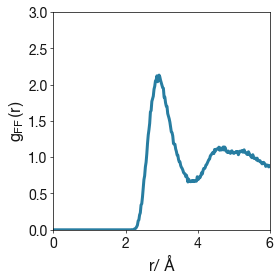

In [4]:
plt.figure(figsize=(4,4))
plt.plot(rdf_ff.r, rdf_ff.rdf, label='F-F',c='#277DA1',linewidth=3)
plt.xlim(0,6)
plt.ylim(0,3)
plt.xlabel(r'r/ $\operatorname{\AA}$',size=16)
plt.ylabel(r'$g_{\operatorname{FF}}(r)$',size=16)
plt.tick_params(labelsize=14,axis='both')
plt.tight_layout()
plt.savefig('f-f-rdf.pdf')


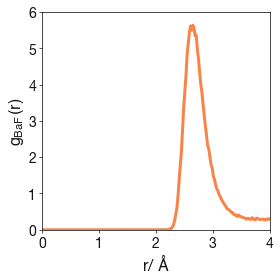

In [5]:
plt.figure(figsize=(4,4))
rdf_snf = RadialDistributionFunction.from_species_strings(structures=pmgs,
                                                                species_i='F', species_j='Sn')
rdf_baf = RadialDistributionFunction.from_species_strings(structures=pmgs,
                                                                species_i='F', species_j='Ba')

plt.plot(rdf_baf.r, rdf_baf.rdf, label='Ba-F',c='#F9844A',linewidth=3)
plt.xlim(0,4)
plt.ylim(0,6)
plt.xlabel(r'r/ $\operatorname{\AA}$',size=16)
plt.ylabel(r'$g_{\operatorname{BaF}}(r)$',size=16)
plt.tick_params(labelsize=14,axis='both')
plt.tight_layout()

plt.savefig('ba-f-rdf.pdf')

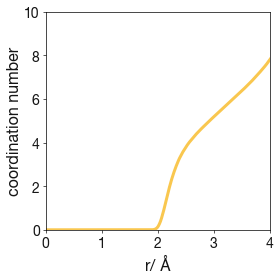

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
rdf_snf = RadialDistributionFunction.from_species_strings(structures=pmgs,
                                                                species_i='F', species_j='Sn')
rdf_baf = RadialDistributionFunction.from_species_strings(structures=pmgs,
                                                                species_i='F', species_j='Ba')

plt.plot(rdf_snf.r, rdf_snf.coordination_number, label='Ba-F',c='#F9C74F',linewidth=3)
plt.xlim(0,4)
plt.ylim(0,10)
plt.xlabel(r'r/ $\operatorname{\AA}$',size=16)
plt.ylabel(r'coordination number',size=16)
plt.tick_params(labelsize=14,axis='both')
plt.tight_layout()

plt.savefig('sn-f-cn.pdf')

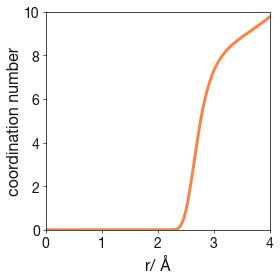

In [7]:
plt.figure(figsize=(4,4))
rdf_snf = RadialDistributionFunction.from_species_strings(structures=pmgs,
                                                                species_i='F', species_j='Sn')
rdf_baf = RadialDistributionFunction.from_species_strings(structures=pmgs,
                                                                species_i='F', species_j='Ba')

plt.plot(rdf_baf.r, rdf_baf.coordination_number, label='Ba-F',c='#F9844A',linewidth=3)
plt.xlim(0,4)
plt.ylim(0,10)
plt.xlabel(r'r/ $\operatorname{\AA}$',size=16)
plt.ylabel(r'coordination number',size=16)
plt.tick_params(labelsize=14,axis='both')
plt.tight_layout()

plt.savefig('ba-f-cn.pdf')

We then calculate the spread of cations from the centre. In order to do this efficiently we use the vasppy RDF module with Iridium ghost atoms placed on a the formal lattice sites. We then differentiate a coodination number plot to get the population density.

Ba54 Sn54 F216


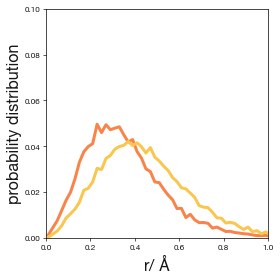

In [8]:
pmgsIr=[]
import numpy as np
from pymatgen.io.vasp import Poscar
structure = Poscar.from_file('POSCAR').structure
print(structure.composition)
coords = np.array(structure.frac_coords[:67+41,:])
for l in range(101,6701,50):
    structure=Structure.from_file("Structures/Sys"+str(l)+"/CONTCAR")
    for k in range(len(coords)):
        structure.append("Ir",coords[k])
    pmgsIr.append(structure)
for l in range(6751,12601,50):
    structure=Structure.from_file("Structures/Sys"+str(l)+"/CONTCAR")
    for k in range(len(coords)):
        structure.append("Ir",coords[k])
    pmgsIr.append(structure)
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
rdf_snIr = RadialDistributionFunction.from_species_strings(structures=pmgsIr,
                                                                species_i='Ir', species_j='Sn')
rdf_baIr = RadialDistributionFunction.from_species_strings(structures=pmgsIr,
                                                                species_i='Ir', species_j='Ba')
plt.plot(rdf_baIr.r[:-1], np.diff(rdf_baIr.coordination_number), label='Site-Ba',c='#F9844A',linewidth=3)
plt.plot(rdf_snIr.r[:-1], np.diff(rdf_snIr.coordination_number), label='Site-Sn',c='#F9C74F',linewidth=3)
plt.xlim(0,1)
plt.ylim(0,.1)
plt.xlabel(r'r/ $\operatorname{\AA}$',size=16)
plt.ylabel(r'probability distribution',size=16)
plt.tight_layout()

plt.savefig("site_probs.pdf")

# Calculating raw data for figure S4

We also present the workflow for plotting the full model comparison with experimental data in figure S4, this workflow works identically to that above

In [ ]:
plt.figure(figsize=(4,8))
rdf_snf = RadialDistributionFunction.from_species_strings(structures=pmgs,
                                                                species_i='F', species_j='Sn')
rdf_baf = RadialDistributionFunction.from_species_strings(structures=pmgs,
                                                                species_i='F', species_j='Ba')
rdf_ff = RadialDistributionFunction.from_species_strings(structures=pmgs,
                                                                species_i='F', species_j='F')

rdf_snsn = RadialDistributionFunction.from_species_strings(structures=pmgs,
                                                                species_i='Sn', species_j='Sn')
rdf_basn = RadialDistributionFunction.from_species_strings(structures=pmgs,
                                                                species_i='Ba', species_j='Sn')
rdf_baba = RadialDistributionFunction.from_species_strings(structures=pmgs,
                                                                species_i='Ba', species_j='Ba')


np.savetxt('rdf_snf',[rdf_snf.r,rdf_snf.rdf])
np.savetxt('rdf_baf',[rdf_baf.r,rdf_baf.rdf])
np.savetxt('rdf_snsn',[rdf_snsn.r,rdf_snsn.rdf])
np.savetxt('rdf_basn',[rdf_basn.r,rdf_basn.rdf])
np.savetxt('rdf_baba',[rdf_baba.r,rdf_baba.rdf])

In [ ]:
plt.figure(figsize=(4,8))

rdf_baba=np.loadtxt('rdf_baba')
rdf_snsn=np.loadtxt('rdf_snsn')
rdf_basn=np.loadtxt('rdf_basn')
rdf_snf=np.loadtxt('rdf_snf')
rdf_baf=np.loadtxt('rdf_baf')

PDF=np.loadtxt('d250_DD-20Apr2021_08-000000_tif_A0.gr',skiprows=27)
plt.plot(PDF[:,0],PDF[:,1]*5+50,c='#90BE6D',label='experimental')
plt.legend()
plt.plot(rdf_snf[0,:], rdf_snf[1,:]+40, label='Sn-F',c='#F9C74F',linewidth=1)
plt.plot(rdf_baf[0,:], rdf_baf[1,:]+30, label='Ba-F',c='#F9844A',linewidth=1)

plt.plot(rdf_snsn[0,:], rdf_snsn[1,:]+20, label='Sn-Sn',c='#F94144',linewidth=1)
plt.plot(rdf_basn[0,:], rdf_basn[1,:]+10, label='Ba-Sn',c='#43AA8B',linewidth=1)
plt.plot(rdf_baba[0,:], rdf_baba[1,:], label='Ba-Ba',c='#577590',linewidth=1)
plt.xlim(0,10)
plt.xlabel(r'$r/ \operatorname{\AA}$')
plt.ylabel(r'$g_{\operatorname{ij}}(r)$')
plt.tight_layout()
plt.tick_params(labelsize=0,axis='y')

plt.savefig('allrdf.pdf')